<a href="https://colab.research.google.com/github/TSffer/IA/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#################################################################################################################################################################
# Implementación de CNN Usando Keras

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [0]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
# Ejecuta esta celda para activar tu cuenta de Google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
from keras.utils import to_categorical
from keras.regularizers import l2

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape : 
Total number of outputs :  10
Output classes  :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

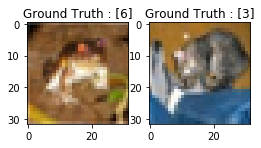

In [19]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : '), test_images.shape, test_labels.shape

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes  : ', classes)

plt.figure(figsize = [4,2])

plt.subplot(121)
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))



In [20]:
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0],nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0],nRows,nCols,nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print(nRows)
print(nCols)
print('Orginal label 0 : ', train_labels[0])
print('After convertion to categorical : ', train_labels_one_hot[0])

32
32
Orginal label 0 :  [6]
After convertion to categorical :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
def createModel():
  model = Sequential()
  
  model.add(Conv2D(32,(3,3),padding='same', activation='relu',input_shape=input_shape))   # El paper indica 16
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,(3,3),padding='same', activation='relu'))  # El paper indica el doble del anterior
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu',activity_regularizer=l2(0.0001)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(250,activation='relu',activity_regularizer=l2(0.0001)))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses,activation='softmax'))
  return model

In [22]:
from keras.models import load_model


model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data,train_labels_one_hot,batch_size=batch_size, epochs = epochs,verbose=1,validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)
model1.save('trained_model1.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
__________

Text(0.5, 1.0, 'Loss Curves')

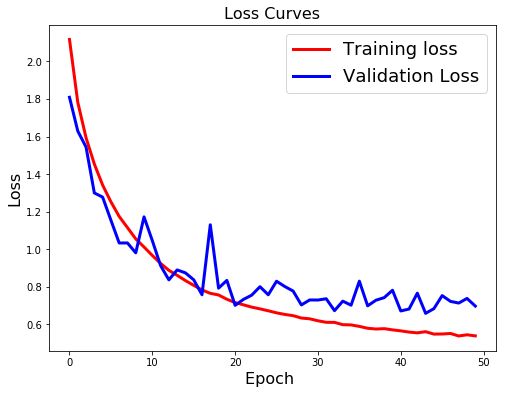

In [23]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth= 3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epoch ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

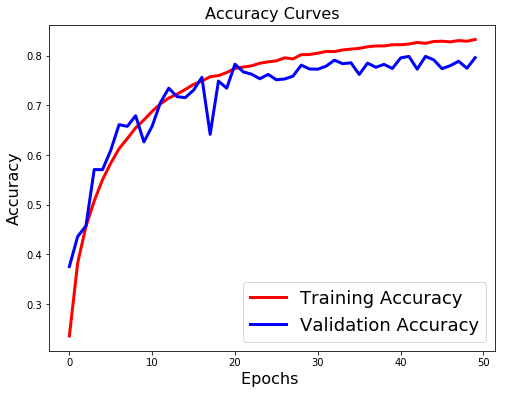

In [24]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
batch_size = 256
epoch = 50
datagen  = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=False)

history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot,batch_size=batch_size),
                               steps_per_epoch=int(np.ceil(train_data.shape[0]/float(batch_size))),
                               epochs=epochs,
                               validation_data=(test_data,test_labels_one_hot),
                               workers=4)

model2.evaluate(test_data, test_labels_one_hot)
model2.save('trained_model2.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_regularizer=<keras.reg...)`


Epoch 1/50
196/196 [==============================] - 23s 118ms/step - loss: 2.3119 - acc: 0.1863 - val_loss: 2.0013 - val_acc: 0.2800
Epoch 2/50
196/196 [==============================] - 22s 113ms/step - loss: 1.8913 - acc: 0.3269 - val_loss: 1.7302 - val_acc: 0.3818
Epoch 3/50
196/196 [==============================] - 22s 114ms/step - loss: 1.6798 - acc: 0.4077 - val_loss: 1.4713 - val_acc: 0.4740
Epoch 4/50
196/196 [==============================] - 22s 113ms/step - loss: 1.5392 - acc: 0.4650 - val_loss: 1.4053 - val_acc: 0.5158
Epoch 5/50
196/196 [==============================] - 22s 113ms/step - loss: 1.4238 - acc: 0.5105 - val_loss: 1.5137 - val_acc: 0.5026
Epoch 6/50
196/196 [==============================] - 22s 113ms/step - loss: 1.3379 - acc: 0.5488 - val_loss: 1.1705 - val_acc: 0.6090
Epoch 7/50
196/196 [==============================] - 22s 115ms/step - loss: 1.2485 - acc: 0.5841 - val_loss: 1.0668 - val_acc: 0.6498
Epoch 8/50
196/196 [==============================] - 2

Text(0.5, 1.0, 'Loss Curves')

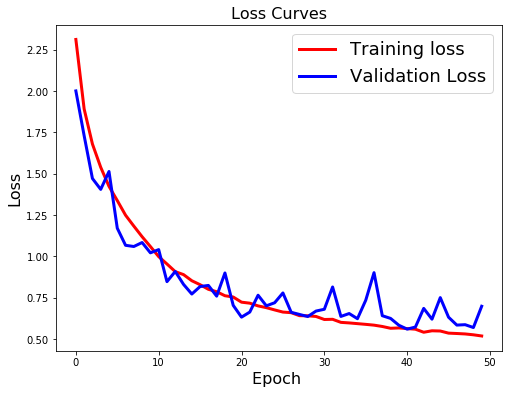

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth = 3.0)
plt.plot(history2.history['val_loss'],'b',linewidth= 3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epoch ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

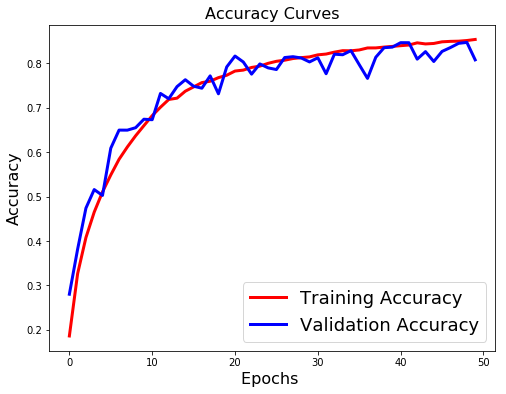

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [26]:
# Predicción, pruebas con imagenes proporcionadas

from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
from IPython.display import Image
import time


model_path = 'trained_model1.h5'

print('Loading model:', model_path)
t0 = time.time()
model =  load_model(model_path)
t1 = time.time()
print('Loaded in:', t1-t0)

model.summary()


def predict(img_path, model):
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    return preds

test_path1 = 'perro.jpg'  # 'drive/My Drive/Prueba_prediccion/perro.jpg'     Si el archivo esta en el Drive

print('Generating predictions on image:', test_path1)
preds = predict(test_path1, model)
print('Predicted clase: ', preds)



Loading model: trained_model1.h5
Loaded in: 2.318228006362915
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_